# Best honeymoon in Athens with a low budget

## Visualisation - Final Project
### Team P Python Markdown

We load any necessary libraries and the data set:

In [1]:
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('listings_cleaned.csv',sep = ',')

## 1) Filter properties with proper double bed


In [2]:
data.shape

(8913, 29)

In [3]:
data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [4]:
data_room = data.room_type.dropna()

In [5]:
data.keys()

Index(['id', 'listing_url', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [6]:
room = ['Entire home/apt']
data.room_type.isin(room)

df_room = data[data.room_type.isin(room)]

In [7]:
df_room.shape

(8162, 29)

In [8]:
df_room.bed_type.unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed'],
      dtype=object)

We found all properties in Athens that have a proper real bed for couples:

In [9]:
df_room_bed = df_room[df_room['bed_type'] == 'Real Bed']

In [10]:
df_room_bed.shape

(8101, 29)

## 2) Find Amenities frequency

In [12]:
amenities = df_room_bed.amenities

In [13]:
def remove_punctuation(word):
    word = word.replace('{',' ')
    word = word.replace('/',' ')
    word = word.replace('"',' ')
    word = word.replace('}',' ')
    word = word.replace(',',' ')
    word = word.replace('and', ' ')
    word = word.replace('or', ' ')
    word = word.replace('to', ' ')
    word = word.strip()
    return(word)

In [14]:
text = []
for items in amenities:
    no_pun = remove_punctuation(items)
    text.append(no_pun)

In [15]:
text = ','.join(text)

In [16]:
token = word_tokenize(text)

In [17]:
fdist = FreqDist(token)
fdist1 = fdist.most_common(20)

In [18]:
fdist1

[('friendly', 9312),
 ('allowed', 8837),
 ('TV', 8333),
 (',', 8100),
 ('Wifi', 7961),
 ('Essentials', 7909),
 ('Kitchen', 7841),
 ('conditioning', 7746),
 ('Air', 7727),
 ('Hangers', 7709),
 ('Hair', 7627),
 ('dryer', 7627),
 ('Shampoo', 7328),
 ('Iron', 7245),
 ('Heating', 6983),
 ('entrance', 6723),
 ('Hot', 6624),
 ('water', 6453),
 ('parking', 6446),
 ('p', 6235)]

Graph below shows the top 10 most common amenities in Athens

Text(0.5, 1.0, 'Top 10 most common amenities in Athens')

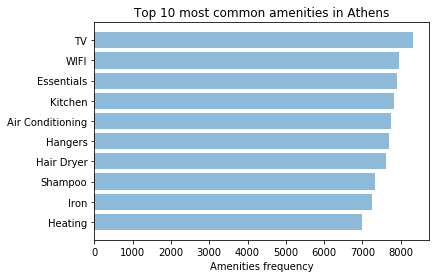

In [19]:
objects = ('Heating','Iron','Shampoo','Hair Dryer','Hangers','Air Conditioning','Kitchen','Essentials','WIFI','TV')
y_pos = np.arange(len(objects))
performance = [6983,7245,7328,7627,7709,7746,7841,7909,7961,8333]

plt.barh(y_pos, performance, alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Amenities frequency')

plt.title('Top 10 most common amenities in Athens')

## 3) Find number of matched properties in each neighbourhood 

In [20]:
nei = df_room_bed.neighbourhood

In [21]:
text_nei = []
for items in nei:
    text_nei.append(items)

In [22]:
type(text_nei)

list

In [23]:
text_nei = ','.join([str(i) for i in text_nei])

In [24]:
token_nei = word_tokenize(text_nei)

In [25]:
fdist_nei = FreqDist(token_nei)
fdist1_nei = fdist_nei.most_common(13)

In [26]:
fdist1_nei

[(',', 8100),
 ('Plaka', 989),
 ('Koukaki', 763),
 ('Neos', 754),
 ('Kosmos', 754),
 ('Kolonaki', 517),
 ('Pangrati', 513),
 ('Larissis', 471),
 ('Ambelokipi', 437),
 ('Metaxourgeio', 406),
 ('Exarcheia', 404),
 ('Psyri', 389),
 ('Kerameikos', 311)]

Graph below shows the top 10 neighbourhood in Athens with double bed

Text(0.5, 1.0, 'Top 10 neighbourhood in Athens with double bed')

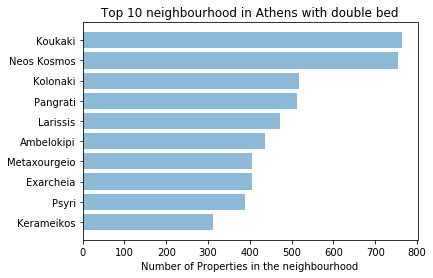

In [27]:
objects = ('Kerameikos', 'Psyri','Exarcheia','Metaxourgeio','Ambelokipi','Larissis','Pangrati','Kolonaki','Neos Kosmos','Koukaki')
y_pos = np.arange(len(objects))
performance = [311, 389, 404, 406, 437, 471, 513, 517,754, 763]

plt.barh(y_pos, performance, alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Properties in the neighbourhood')

plt.title('Top 10 neighbourhood in Athens with double bed')

## 4）Predict future price for properties in Athens

In [28]:
calendar = pd.read_csv('C:/Users/zhaoy/Desktop/victor/calendar.csv')
#change price type to int
calendar['price']=calendar['price'].replace('[\$,]', '', regex=True).astype(float)
calendar['adjusted_price']=calendar['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2019-11-19,f,59.0,59.0,1,45
1,10595,2019-11-20,f,59.0,59.0,1,45
2,10595,2019-11-21,f,59.0,59.0,1,45
3,10595,2019-11-22,f,59.0,59.0,1,45
4,10595,2019-11-23,f,59.0,59.0,1,45


In [29]:
#change date type to year
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.set_index(['date'], inplace = True) 
#avg price per month
dt = calendar.groupby(pd.Grouper(freq='M')).mean()
dt

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
date,,,,,
2019-11-30,2.565721e+07,60.085664,59.791656,3.828199,1667.521590
2019-12-31,2.565721e+07,65.278832,64.850458,3.836444,1667.986278
2020-01-31,2.565721e+07,70.968441,70.230816,3.835353,1668.837767
2020-02-29,2.565721e+07,82.664281,82.431587,3.753848,1668.864482
2020-03-31,2.565721e+07,85.977294,85.783851,3.581413,1668.838082
2020-04-30,2.565721e+07,89.088632,88.867034,3.587813,1669.099381
2020-05-31,2.565721e+07,95.104659,94.855453,3.584469,1669.690159
2020-06-30,2.565721e+07,96.289168,96.024248,3.582772,1669.702986
2020-07-31,2.565721e+07,96.465429,96.196155,3.579786,1669.798275


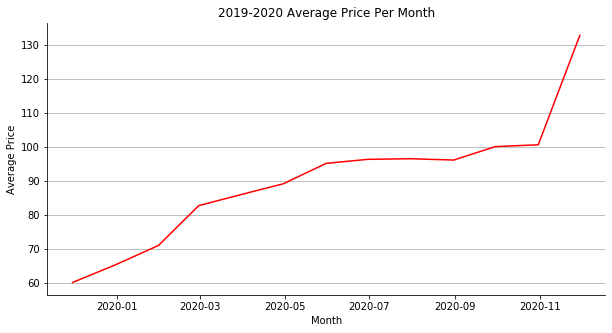

In [30]:
#Average price change
dt_price_change = dt['price'].pct_change()*100 
fig, ax = plt.subplots(figsize=(10,5)) 
ax.plot(dt.index, dt['price'], color = 'red')
ax.set_ylabel('Average Price')  # add the y-axis label
ax.set_xlabel('Month')                 # add the x-axis label
ax.set_title('2019-2020 Average Price Per Month')

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top
ax.yaxis.grid() # horizontal lines
#plt.savefig('2019_2020_price.png') 

In [31]:
#We only want the price from 2019-11-29 to 2020-11-30
d = calendar.index >= '2019-11-29'
e = calendar.loc[d]

# We want to distinguish the availability
#ct as the available lists
ct = e['available']=='t'    
ct = e.loc[ct]

#cf as the unavailable lists
cf = e['available']=='f'   
cf = e.loc[cf]

#group by list id and calculate the avg price per month
ct =ct.groupby(pd.Grouper(freq='M')).mean()
cf =cf.groupby(pd.Grouper(freq='M')).mean()
cf.head()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
date,,,,,
2019-11-30,2.494904e+07,59.225299,59.101629,5.092493,2665.909485
2019-12-31,2.440183e+07,66.733469,65.961359,6.088621,3228.845358
2020-01-31,2.390317e+07,89.803245,87.625095,7.364602,4086.170807
2020-02-29,2.414775e+07,88.292834,88.196109,6.209030,4372.057227
2020-03-31,2.445869e+07,83.302662,83.157191,4.079808,4219.300508


In [32]:
#we want to analyse the growth rate of average price
#available lists
pt_change_2020 = ct['price'].pct_change()*100   #percentage change, growth rate
#unavailable lists
pf_change_2020 = cf['price'].pct_change()*100   #percentage change, growth rate

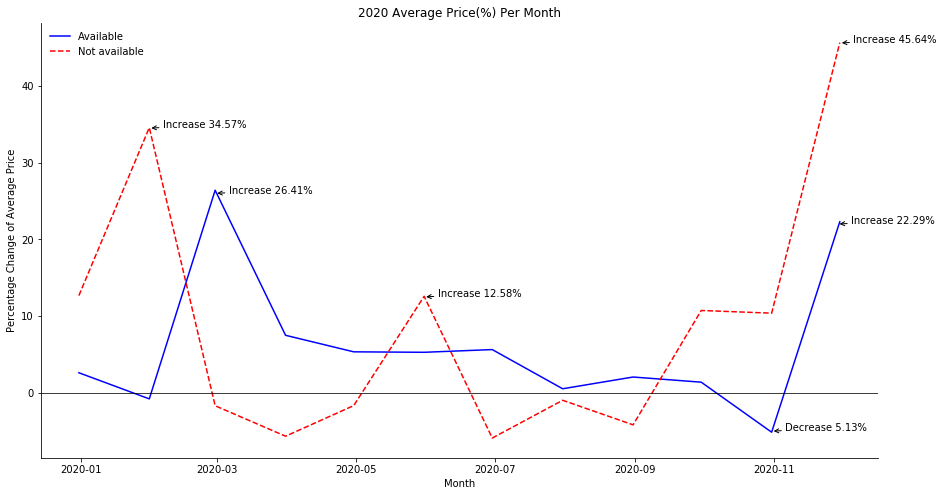

In [33]:
my_props = {'facecolor':'black',  'arrowstyle':'->'}

#2020 availability
new_fig, new_ax = plt.subplots(figsize = (15,8))

new_ax.plot(ct.index,pt_change_2020,color = 'blue',label = "Available")
new_ax.plot(ct.index,pf_change_2020,'r--',color = 'red',label = "Not available")
new_ax.axhline(y=0, color='black', linewidth=0.75) 
new_ax.set_ylabel('Percentage Change of Average Price')  # add the y-axis label
new_ax.set_xlabel('Month')                 # add the x-axis label
new_ax.set_title('2020 Average Price(%) Per Month')

new_ax.spines['right'].set_visible(False) # get ride of the line on the right
new_ax.spines['top'].set_visible(False)   # get rid of the line on top

new_ax.legend(frameon=False) 

new_ax.annotate('Increase 34.57%', xy=('2020-01-31', 34.5), xytext=('2020-02-06',34.5), arrowprops=my_props)
new_ax.annotate('Decrease 5.13%', xy=('2020-10-31', -5), xytext=('2020-11-06',-5), arrowprops=my_props)
new_ax.annotate('Increase 26.41%', xy=('2020-02-29', 26), xytext=('2020-03-06',26), arrowprops=my_props)
new_ax.annotate('Increase 12.58%', xy=('2020-05-31', 12.5), xytext=('2020-06-06',12.5), arrowprops=my_props)
new_ax.annotate('Increase 45.64%', xy=('2020-11-30', 45.6), xytext=('2020-12-06',45.6), arrowprops=my_props)
new_ax.annotate('Increase 22.29%', xy=('2020-11-29', 22), xytext=('2020-12-05',22), arrowprops=my_props)

plt.show()
#plt.savefig('2020_availability.png') 

## 5) Make final recommendation on properties

In [40]:
df = df_room_bed

#Find the matched properties with criteria on price, review scores, room type, bed type etc...
df = df[df['price'] <= 50]
df = df[df['availability_365'] == 365]
df = df[df['review_scores_rating'] >= 95]
df = df[df['neighbourhood'] == 'Koukaki']
df = df[df['room_type'] == 'Entire home/apt']


In the end we have 3 properties matched our criteria, we provide the airbnb link for them:

In [41]:
df.listing_url

1702    https://www.airbnb.com/rooms/15627184
3436    https://www.airbnb.com/rooms/22916423
6942    https://www.airbnb.com/rooms/33465448
Name: listing_url, dtype: object